In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(100,100).view(-1,1,100,100)
        self._to_linear = None
        self.convs(x)
        
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256,29)

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x)) # bc this is our output layer. No activation here.
        x = self.fc3(x)
        return F.softmax(x, dim=1)

In [9]:
model = Net()
model.load_state_dict(torch.load('initial_model'))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=10368, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=29, bias=True)
)

In [143]:
LABELs = {}
LABELS2 = {}
for i in enumerate(['H','E','L','O','W','R','D','space','del','nothing']):
    LABELS[i[0]]=i[1]
    LABELS2[i[1]]=i[0]
print(LABELS,LABELS2)

{0: 'H', 1: 'E', 2: 'L', 3: 'O', 4: 'W', 5: 'R', 6: 'D', 7: 'space', 8: 'del', 9: 'nothing'} {'H': 0, 'E': 1, 'L': 2, 'O': 3, 'W': 4, 'R': 5, 'D': 6, 'space': 7, 'del': 8, 'nothing': 9}


In [54]:
new_data = []
for i in os.listdir('new_data'):
    for f in tqdm(os.listdir('new_data/'+i)):
        path = f'new_data/{i}/{f}'
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100,100))
        new_data.append([np.array(img)/255,LABELS[i]])



100%|██████████| 30/30 [00:00<00:00, 821.19it/s]


In [60]:
new_data_imgs = torch.Tensor([i[0] for i in new_data]).view(-1,100,100)
new_labels =[i[1] for i in new_data]

 19%|█▊        | 28/150 [00:00<00:00, 128.74it/s]

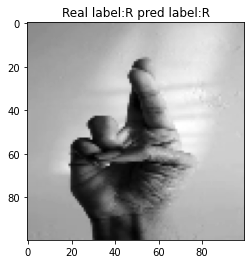

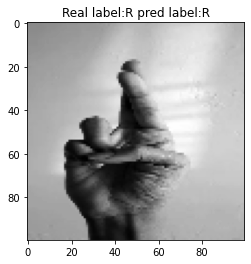

 24%|██▍       | 36/150 [00:01<00:04, 28.19it/s] 

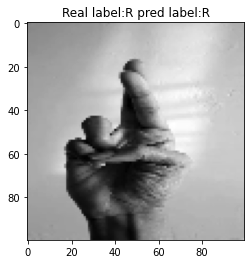

 28%|██▊       | 42/150 [00:01<00:05, 20.75it/s]

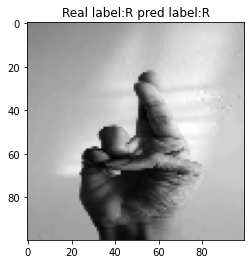

 31%|███▏      | 47/150 [00:01<00:06, 17.10it/s]

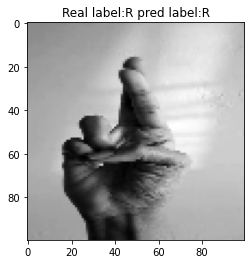

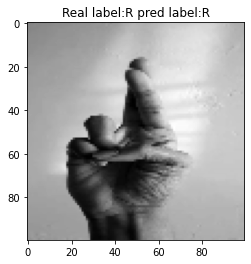

 34%|███▍      | 51/150 [00:02<00:09,  9.93it/s]

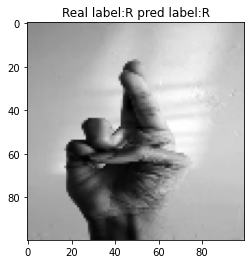

 36%|███▌      | 54/150 [00:03<00:10,  9.38it/s]

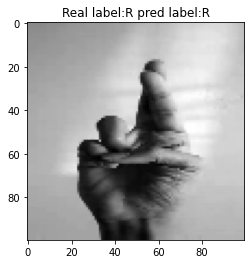

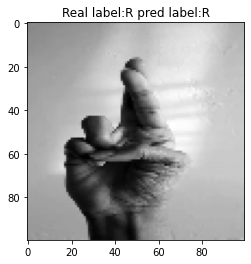

 37%|███▋      | 56/150 [00:03<00:16,  5.75it/s]

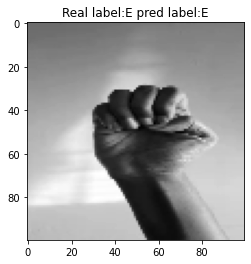

 41%|████      | 61/150 [00:04<00:12,  7.00it/s]

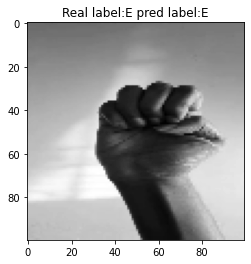

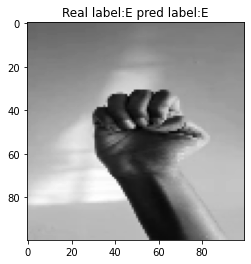

 42%|████▏     | 63/150 [00:04<00:18,  4.78it/s]

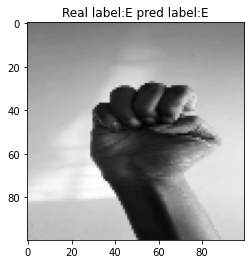

 43%|████▎     | 65/150 [00:05<00:17,  4.97it/s]

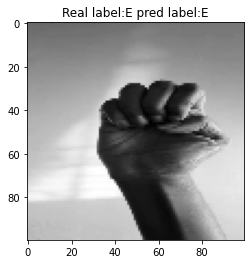

 44%|████▍     | 66/150 [00:05<00:20,  4.05it/s]

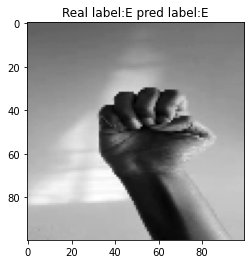

 45%|████▌     | 68/150 [00:05<00:18,  4.41it/s]

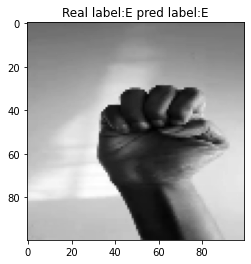

 46%|████▌     | 69/150 [00:06<00:21,  3.76it/s]

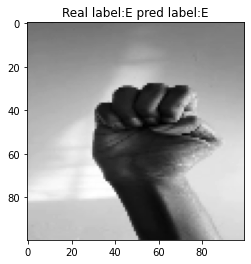

 47%|████▋     | 71/150 [00:06<00:18,  4.22it/s]

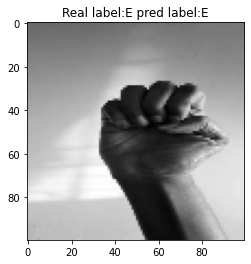

 48%|████▊     | 72/150 [00:06<00:21,  3.57it/s]

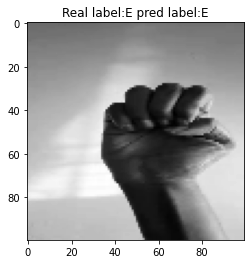

 49%|████▊     | 73/150 [00:07<00:22,  3.35it/s]

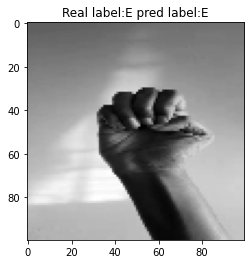

 49%|████▉     | 74/150 [00:07<00:23,  3.18it/s]

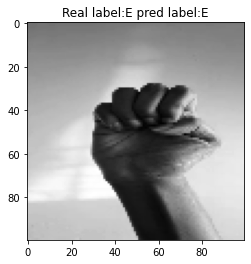

 50%|█████     | 75/150 [00:07<00:24,  3.12it/s]

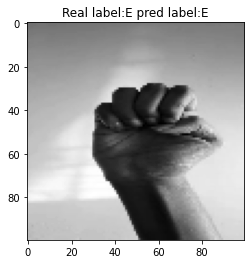

 51%|█████▏    | 77/150 [00:08<00:20,  3.54it/s]

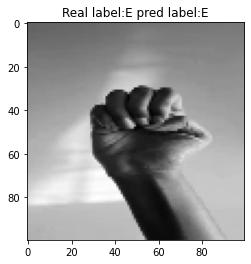

 52%|█████▏    | 78/150 [00:08<00:23,  3.08it/s]

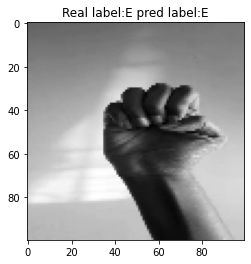

 53%|█████▎    | 79/150 [00:09<00:23,  2.98it/s]

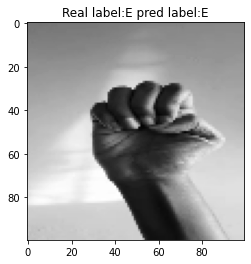

 53%|█████▎    | 80/150 [00:09<00:24,  2.91it/s]

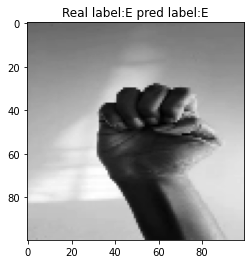

 54%|█████▍    | 81/150 [00:09<00:24,  2.86it/s]

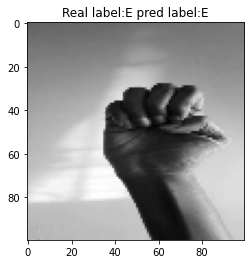

 55%|█████▍    | 82/150 [00:10<00:23,  2.85it/s]

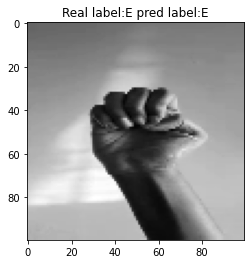

 56%|█████▌    | 84/150 [00:10<00:19,  3.37it/s]

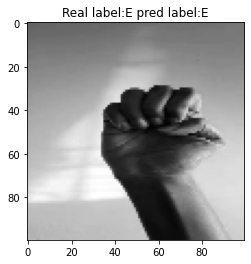

 57%|█████▋    | 85/150 [00:10<00:20,  3.19it/s]

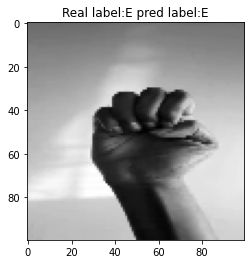

 58%|█████▊    | 87/150 [00:11<00:17,  3.62it/s]

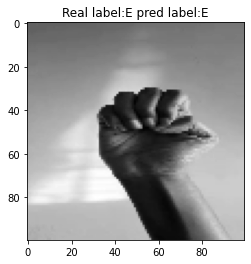

 59%|█████▊    | 88/150 [00:11<00:18,  3.32it/s]

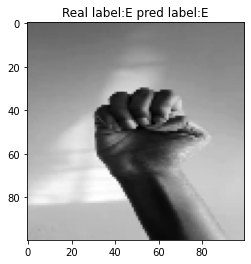

 60%|██████    | 90/150 [00:12<00:16,  3.74it/s]

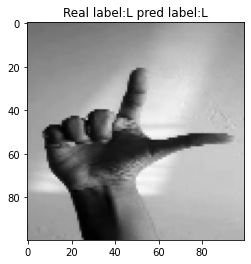

 61%|██████    | 91/150 [00:12<00:16,  3.48it/s]

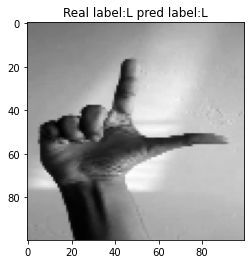

 61%|██████▏   | 92/150 [00:12<00:18,  3.19it/s]

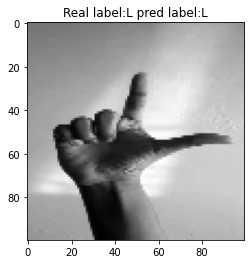

 62%|██████▏   | 93/150 [00:13<00:19,  2.92it/s]

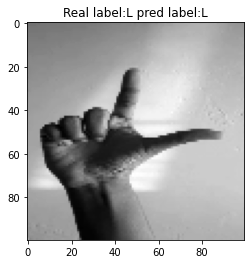

 63%|██████▎   | 94/150 [00:13<00:19,  2.93it/s]

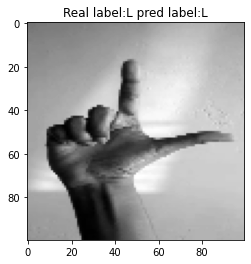

 63%|██████▎   | 95/150 [00:13<00:18,  2.92it/s]

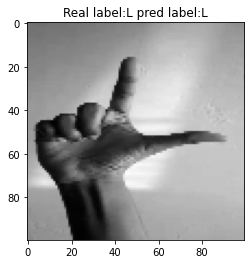

 64%|██████▍   | 96/150 [00:14<00:18,  2.92it/s]

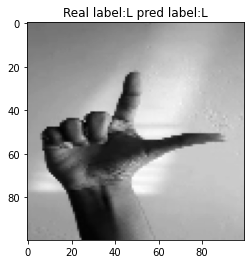

 65%|██████▍   | 97/150 [00:14<00:18,  2.92it/s]

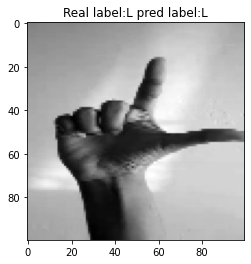

 65%|██████▌   | 98/150 [00:14<00:17,  2.93it/s]

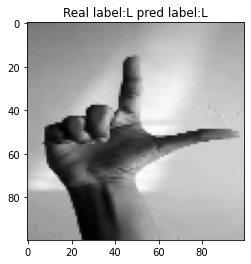

 66%|██████▌   | 99/150 [00:15<00:17,  2.93it/s]

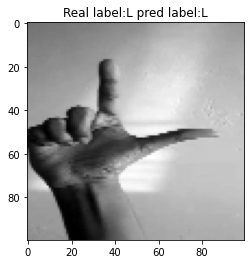

 67%|██████▋   | 100/150 [00:15<00:17,  2.93it/s]

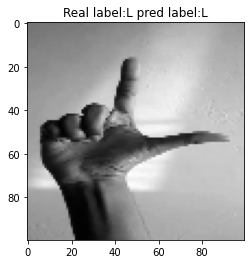

 67%|██████▋   | 101/150 [00:15<00:16,  2.93it/s]

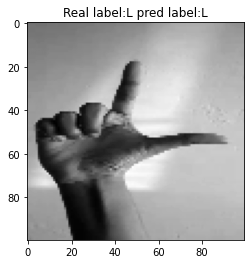

 68%|██████▊   | 102/150 [00:16<00:16,  2.93it/s]

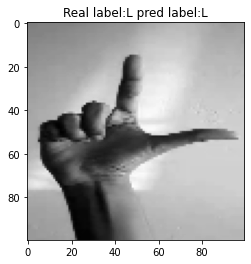

 69%|██████▊   | 103/150 [00:16<00:15,  2.94it/s]

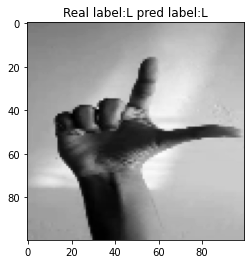

 69%|██████▉   | 104/150 [00:16<00:15,  2.96it/s]

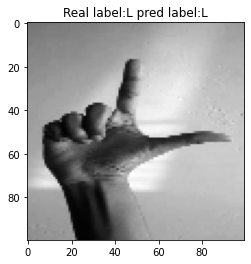

 70%|███████   | 105/150 [00:17<00:16,  2.81it/s]

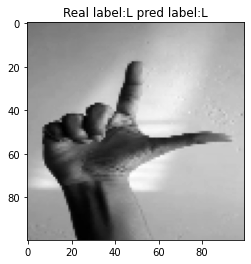

 71%|███████▏  | 107/150 [00:17<00:12,  3.31it/s]

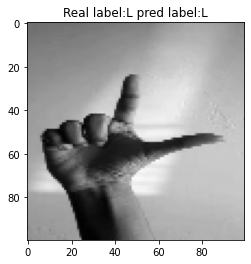

 72%|███████▏  | 108/150 [00:17<00:13,  3.14it/s]

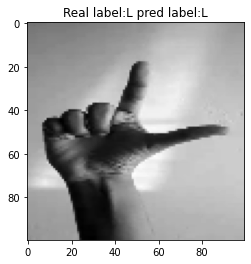

 73%|███████▎  | 109/150 [00:18<00:13,  3.07it/s]

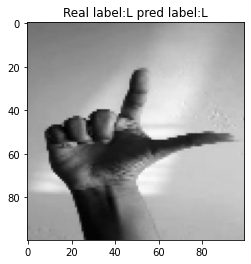

 73%|███████▎  | 110/150 [00:18<00:13,  2.99it/s]

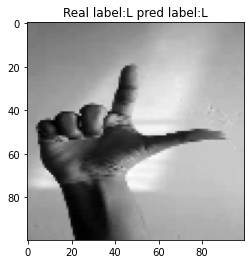

 74%|███████▍  | 111/150 [00:19<00:13,  2.98it/s]

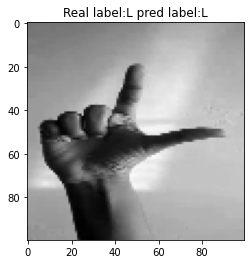

 75%|███████▍  | 112/150 [00:19<00:12,  2.97it/s]

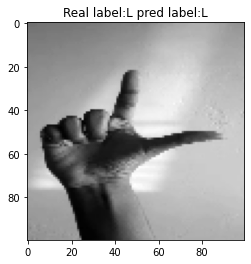

 75%|███████▌  | 113/150 [00:19<00:12,  2.98it/s]

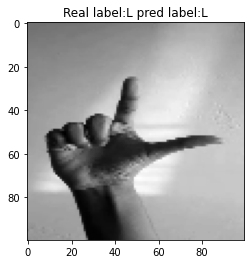

 76%|███████▌  | 114/150 [00:20<00:12,  2.96it/s]

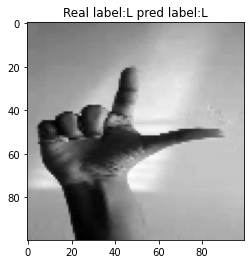

 77%|███████▋  | 115/150 [00:20<00:12,  2.86it/s]

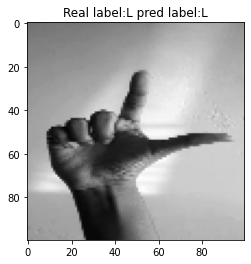

 77%|███████▋  | 116/150 [00:20<00:11,  2.90it/s]

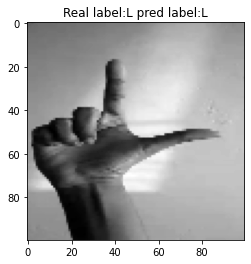

 78%|███████▊  | 117/150 [00:21<00:11,  2.80it/s]

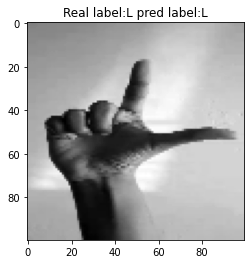

 79%|███████▊  | 118/150 [00:21<00:11,  2.69it/s]

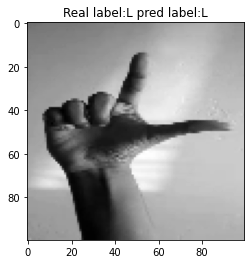

 80%|████████  | 120/150 [00:21<00:09,  3.18it/s]

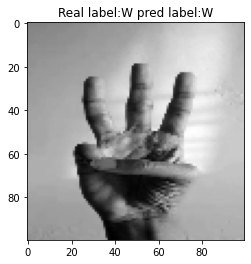

 81%|████████  | 121/150 [00:22<00:09,  3.03it/s]

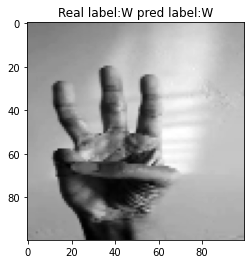

 81%|████████▏ | 122/150 [00:22<00:09,  2.95it/s]

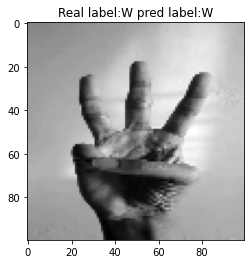

 82%|████████▏ | 123/150 [00:22<00:09,  2.94it/s]

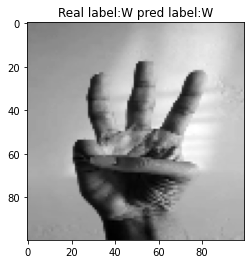

 83%|████████▎ | 124/150 [00:23<00:08,  2.94it/s]

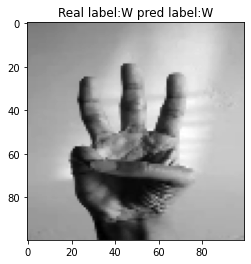

 83%|████████▎ | 125/150 [00:23<00:08,  2.86it/s]

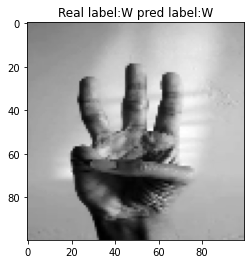

 84%|████████▍ | 126/150 [00:24<00:08,  2.87it/s]

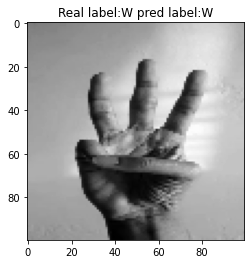

 85%|████████▍ | 127/150 [00:24<00:08,  2.84it/s]

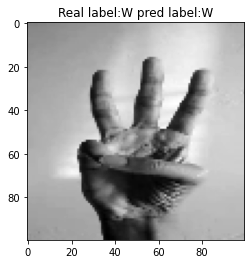

 86%|████████▌ | 129/150 [00:24<00:06,  3.33it/s]

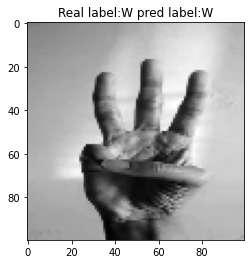

 87%|████████▋ | 130/150 [00:25<00:06,  3.14it/s]

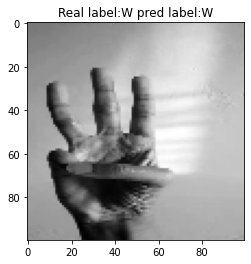

 87%|████████▋ | 131/150 [00:25<00:06,  3.03it/s]

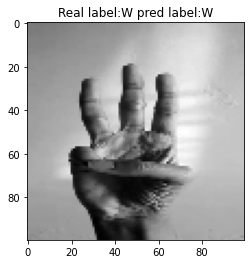

 88%|████████▊ | 132/150 [00:25<00:06,  2.83it/s]

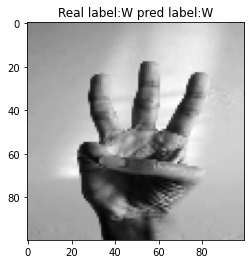

 89%|████████▊ | 133/150 [00:26<00:06,  2.83it/s]

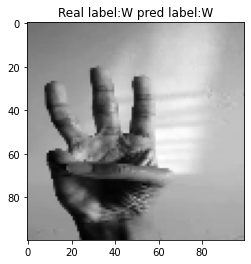

 90%|█████████ | 135/150 [00:26<00:04,  3.36it/s]

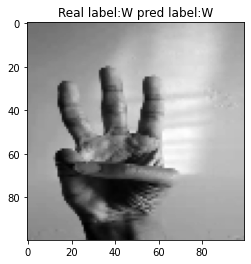

 91%|█████████▏| 137/150 [00:26<00:03,  3.79it/s]

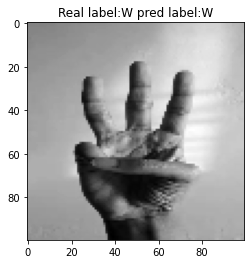

 92%|█████████▏| 138/150 [00:27<00:03,  3.51it/s]

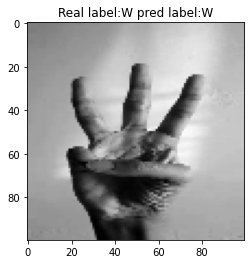

 93%|█████████▎| 139/150 [00:27<00:03,  3.27it/s]

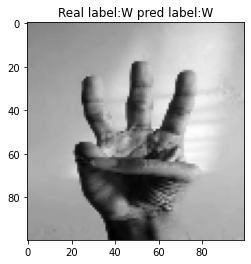

 93%|█████████▎| 140/150 [00:27<00:03,  3.18it/s]

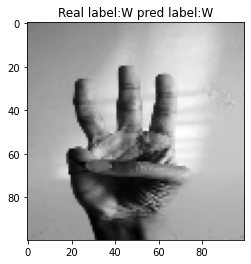

 94%|█████████▍| 141/150 [00:28<00:02,  3.04it/s]

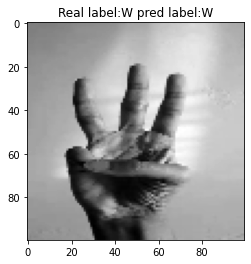

 95%|█████████▍| 142/150 [00:28<00:02,  2.95it/s]

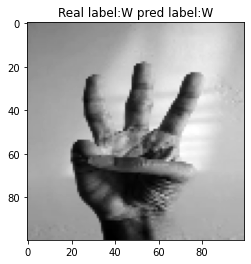

 95%|█████████▌| 143/150 [00:29<00:02,  2.94it/s]

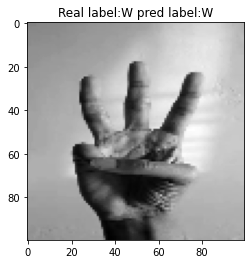

 96%|█████████▌| 144/150 [00:29<00:02,  2.87it/s]

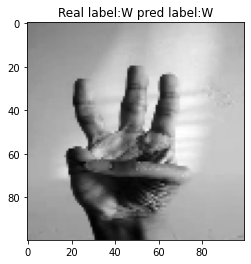

 97%|█████████▋| 145/150 [00:29<00:01,  2.83it/s]

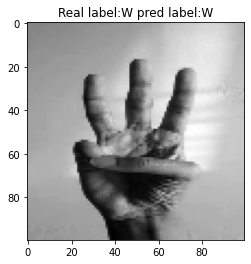

 97%|█████████▋| 146/150 [00:30<00:01,  2.70it/s]

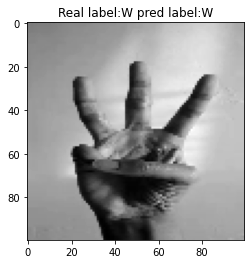

100%|██████████| 150/150 [00:30<00:00,  4.91it/s]

Accuracy: 0.56


In [76]:
correct = 0 
total = 0 
with torch.no_grad():
    for i in tqdm(range(len(new_data_imgs))):
        real_class = new_labels[i]
        net_out = model(new_data_imgs[i].view(-1,1,100,100))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
            plt.imshow(new_data_imgs[i], cmap="gray")
            plt.title(f'Real label:{LABELS[new_labels[i]]} pred label:{LABELS[(int(predicted_class))]}')
            plt.pause(0.2)
        else:
            pass
        total+=1
    print('Accuracy:',round(correct/total,3))
            
    
    

In [136]:
def feed_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100,100))/255
    img = torch.Tensor(img).view(-1,1,100,100)
    return img
torch.argmax(model(feed_img('new_data/H/frame-.jpg')))

tensor(3)

In [168]:
correctly_classified = []
incorrectly_classified = []
for i in os.listdir('new_data'):
    for f in tqdm(os.listdir('new_data/'+i)):

        if LABELS2[i] == int(torch.argmax(model(feed_img(f'new_data/{i}/{f}')))):
            correctly_classified.append(f'new_data/{i}/{f}')
        else:
            incorrectly_classified.append(f'new_data/{i}/{f}')
        

100%|██████████| 30/30 [00:00<00:00, 121.87it/s]


In [169]:
len(correctly_classified)

84

In [170]:
len(incorrectly_classify)

30

In [171]:
correctly_classified

['new_data/R/frame-5.jpg',
 'new_data/R/frame-1.jpg',
 'new_data/R/frame-2.jpg',
 'new_data/R/frame-29.jpg',
 'new_data/R/frame-6.jpg',
 'new_data/R/frame-4.jpg',
 'new_data/R/frame-0.jpg',
 'new_data/R/frame-15.jpg',
 'new_data/R/frame-3.jpg',
 'new_data/E/frame-5.jpg',
 'new_data/E/frame-19.jpg',
 'new_data/E/frame-8.jpg',
 'new_data/E/frame-23.jpg',
 'new_data/E/frame-18.jpg',
 'new_data/E/frame-11.jpg',
 'new_data/E/frame-28.jpg',
 'new_data/E/frame-20.jpg',
 'new_data/E/frame-17.jpg',
 'new_data/E/frame-29.jpg',
 'new_data/E/frame-10.jpg',
 'new_data/E/frame-21.jpg',
 'new_data/E/frame-22.jpg',
 'new_data/E/frame-6.jpg',
 'new_data/E/frame-13.jpg',
 'new_data/E/frame-4.jpg',
 'new_data/E/frame-16.jpg',
 'new_data/E/frame-14.jpg',
 'new_data/E/frame-7.jpg',
 'new_data/E/frame-15.jpg',
 'new_data/E/frame-27.jpg',
 'new_data/E/frame-12.jpg',
 'new_data/E/frame-9.jpg',
 'new_data/L/frame-5.jpg',
 'new_data/L/frame-19.jpg',
 'new_data/L/frame-8.jpg',
 'new_data/L/frame-1.jpg',
 'new_da

In [154]:
LABELS[0]

'H'